In [1]:
%%capture
%cd scripts

In [2]:
import os

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Style
sns.set_theme(context='talk', style='white', palette='Set2')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['figure.facecolor'] = (1., 0., 0., 0.)

In [3]:
DATA_DIR = '../../data/Fig5D_degs_braak'
sections = {
    'Early vs Late': 'DEGs_EarlyvsLate_combined_fdr05.csv',
    'Early vs Mid': 'DEGs_EarlyvsMid_combined_fdr05.csv',
    'Mid vs Late': 'DEGs_MidvsLate_combined_fdr05.csv',
}

In [45]:
# Read data
data = {}
for k, fname in sections.items():
    data[k] = pd.read_csv(os.path.join(DATA_DIR, fname), index_col=0).reset_index()

#Sample, melt, and concat
data_concat = pd.DataFrame()
for k in data:
    # Sample
    # data[k] = data[k].iloc[np.random.choice(data[k].shape[0], 100)]  # Replace

    # Melt
    # data[k] = data[k].pivot_table(columns='gene', index='Celltype', values='log_fold_change')

    # Tag
    data[k]['Comparison'] = k

    # Concat
    data_concat = pd.concat((data_concat, data[k]), axis=0).reset_index(drop=True)

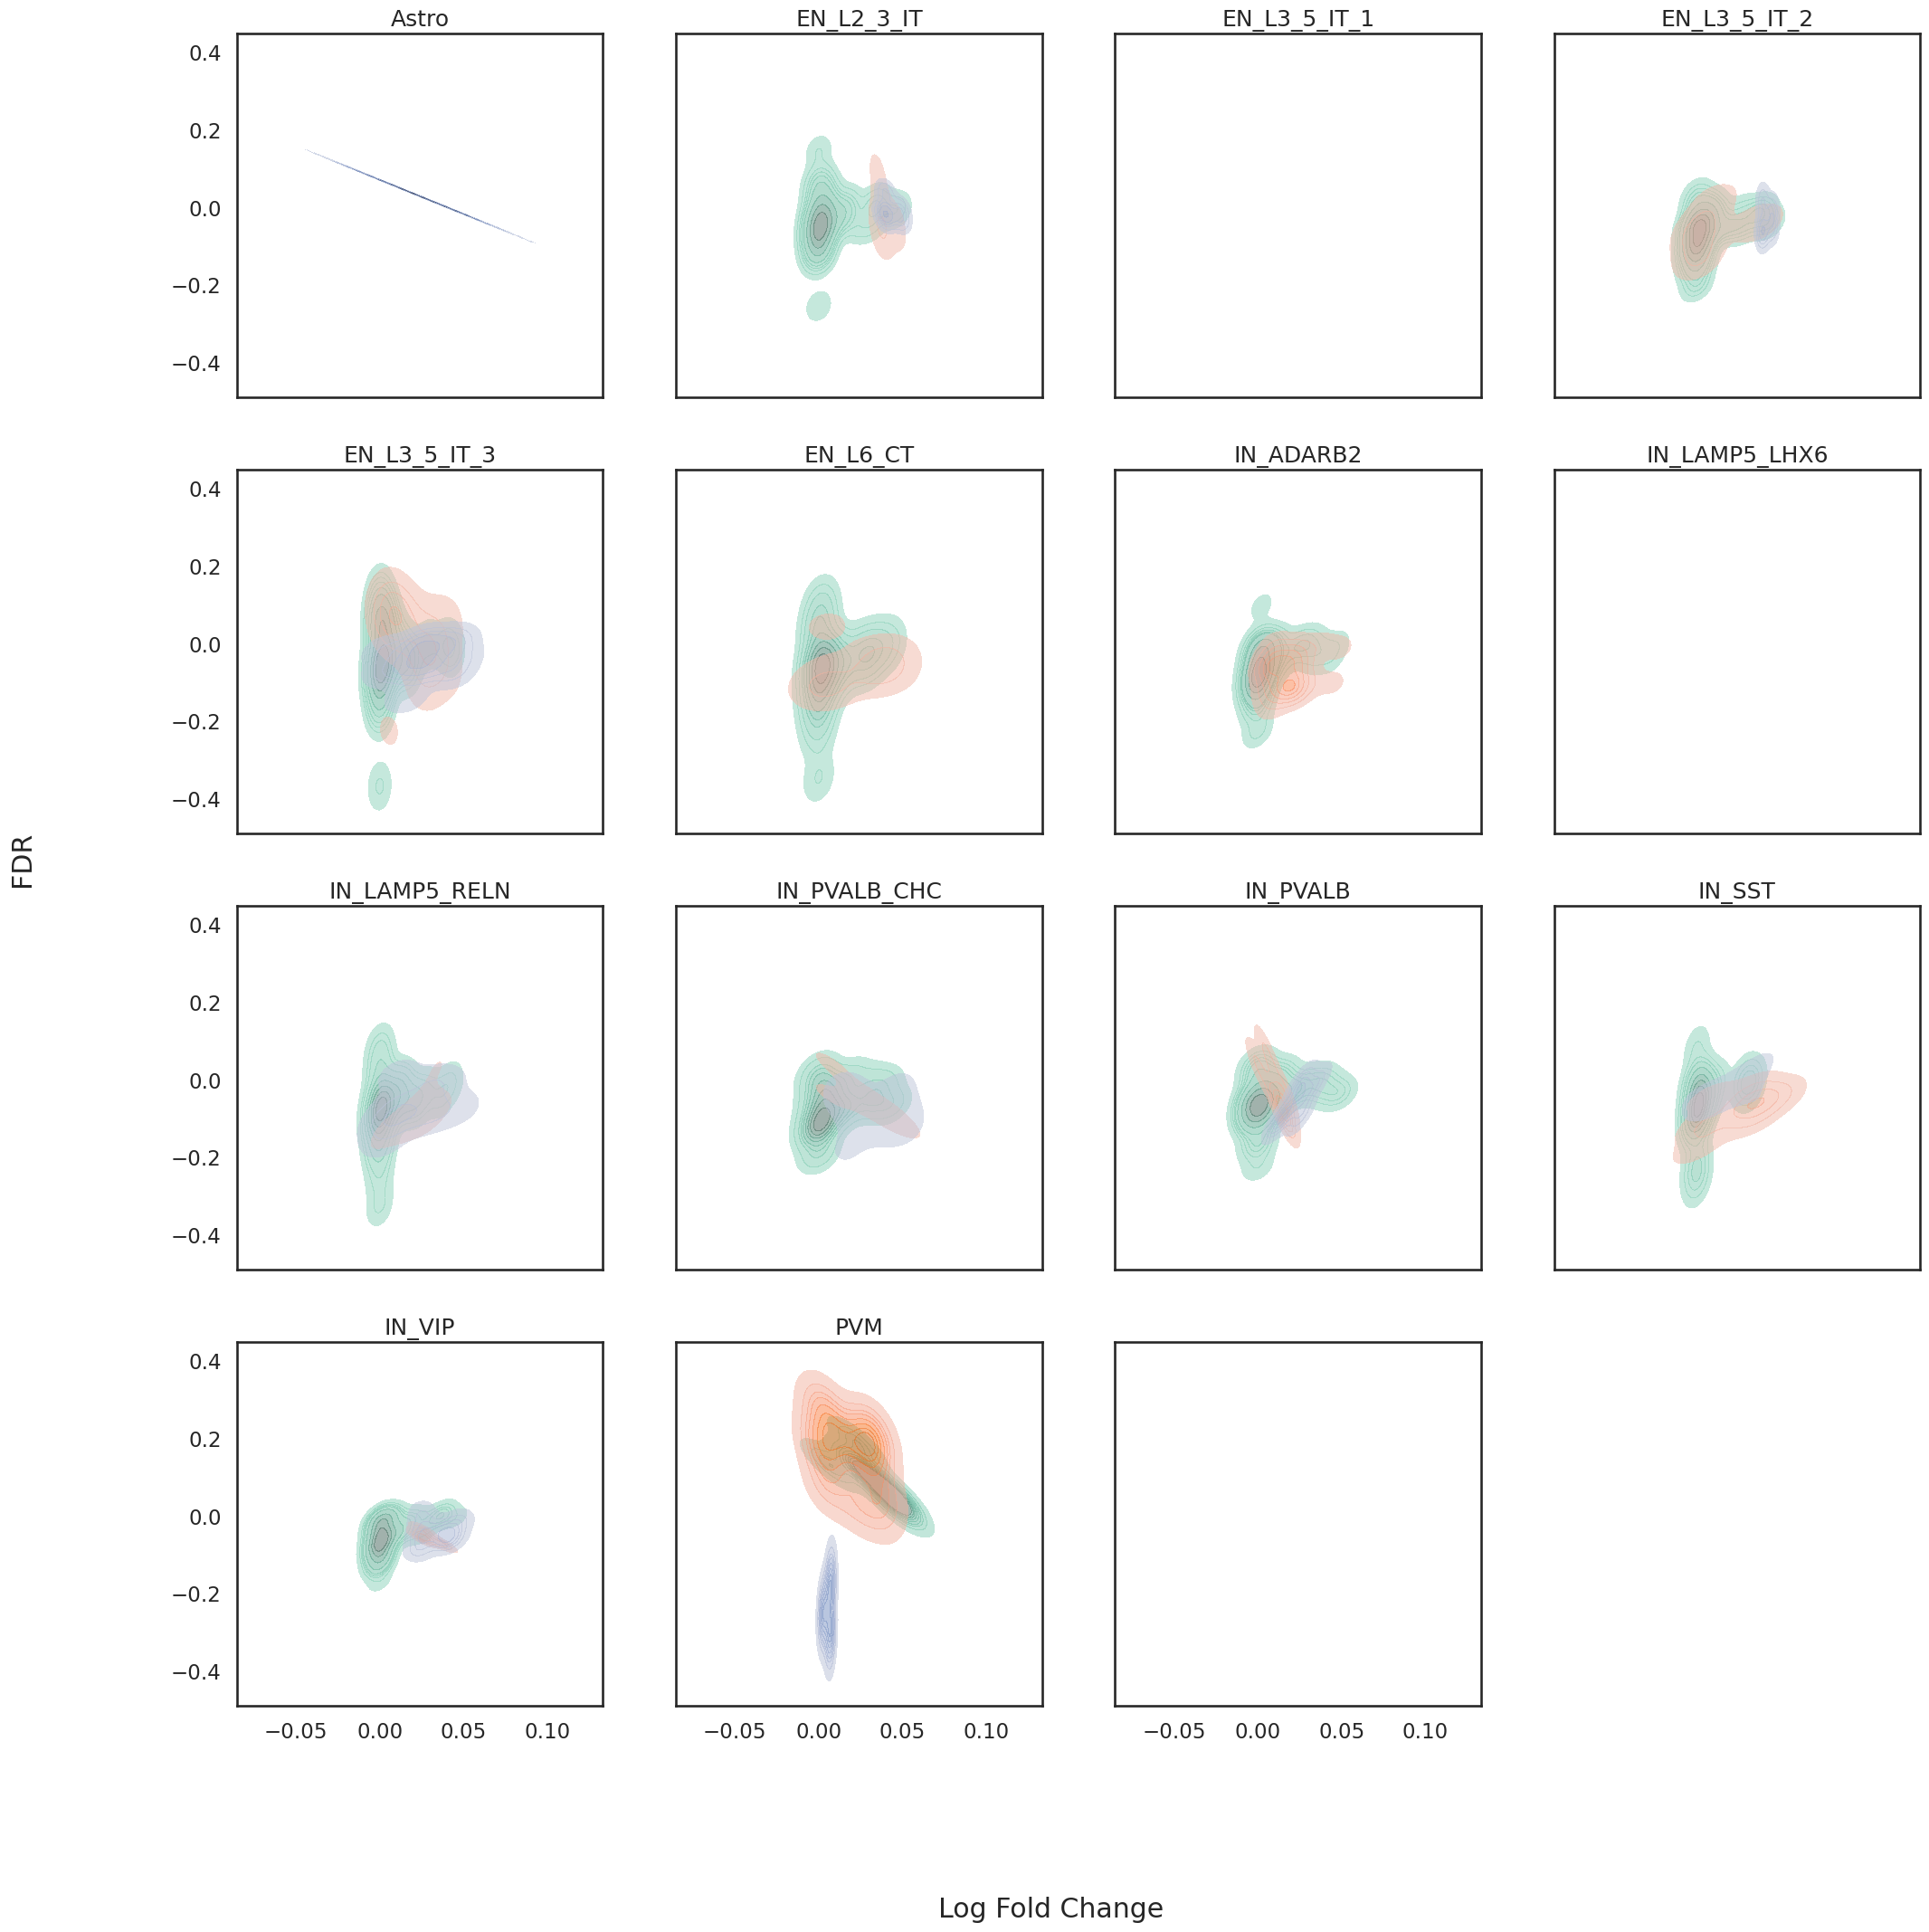

In [71]:
# Plot
celltypes = data[k]['Celltype'].unique()
dim = int(np.ceil(np.sqrt(data[k]['Celltype'].unique().shape[0] + 1)))  # Add one for legend
dim_scale = 6
fig, axs = plt.subplots(dim, dim, figsize=(dim_scale*dim, dim_scale*dim), sharex=True, sharey=True)

x_col = 'fdr'
y_col = 'log_fold_change'
for i, ct in enumerate(celltypes):
    # Density plots
    try:
        sns.kdeplot(
            data=data_concat.loc[data_concat['Celltype']==ct],
            x=x_col,
            y=y_col,
            hue='Comparison',
            fill=True,
            alpha=.5,
            warn_singular=False,
            legend=False,
            ax=axs[i // dim][i % dim])
    except:
        pass
        
    # Labels
    axs[i // dim][i % dim].set_xlabel(None)
    axs[i // dim][i % dim].set_ylabel(None)
    axs[i // dim][i % dim].set_title(ct)

# Set labels
fig.supxlabel('Log Fold Change')
fig.supylabel('FDR')

axs[dim-1][dim-1].axis('off')

# Save
plt.savefig('../plots/figure_5_density.pdf', bbox_inches='tight')